<a href="https://colab.research.google.com/github/raghav2069/Stock-market-prediction-using-CNN/blob/main/Autoregression_with_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

         Date  Temp
0  1981-01-01  20.7
1  1981-01-02  17.9
2  1981-01-03  18.8
3  1981-01-04  14.6
4  1981-01-05  15.8


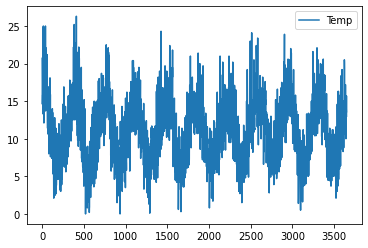

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
series = pd.read_csv(url)
print(series.head())
series.plot()
pyplot.show()

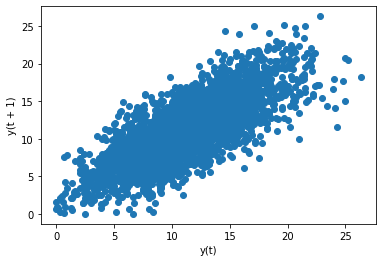

In [ ]:
from matplotlib import pyplot
from pandas.plotting import lag_plot
lag_plot(series['Temp'])
pyplot.show()

In [ ]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

ValueError: ignored

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0)
autocorrelation_plot(series)
pyplot.show()

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0)
plot_acf(series, lags=31)
pyplot.show()

In [ ]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0)
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
 
# persistence model
def model_persistence(x):
	return x
 
# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
# plot predictions vs expected
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()